In [ ]:
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_data"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_PL = df[(df["job_title"] == "Data Analyst") & (df["job_country"] == "Poland")].copy()

In [3]:
df_DA_PL["job_posted_month_no"] = df_DA_PL["job_posted_data"].dt.month

In [4]:
df_DA_PL_explode = df_DA_PL.explode("job_skills")

In [5]:
df_DA_PL_pivot = df_DA_PL_explode.pivot_table(index="job_posted_month_no", columns='job_skills', aggfunc='size', fill_value=0)
df_DA_PL_pivot.loc['Total'] = df_DA_PL_pivot.sum()
df_DA_PL_pivot = df_DA_PL_pivot[df_DA_PL_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_PL_pivot = df_DA_PL_pivot.drop('Total')

In [6]:
dA_totals = df_DA_PL.groupby("job_posted_month_no").size()

In [7]:
df_DA_PL_percent = df_DA_PL_pivot.div(dA_totals/100, axis=0)

In [8]:
df_DA_PL_percent = df_DA_PL_percent.reset_index()
df_DA_PL_percent["job_posted_month"] = df_DA_PL_percent["job_posted_month_no"].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_PL_percent = df_DA_PL_percent.set_index('job_posted_month')
df_DA_PL_percent = df_DA_PL_percent.drop(columns="job_posted_month_no")

df_DA_PL_percent

job_skills,sql,python,excel,tableau,power bi,azure,r,aws,gcp,sas,...,atlassian,angular,ggplot2,flask,gitlab,jquery,react,powerbi,plotly,unix
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,80.555556,44.444444,45.833333,44.444444,16.666667,11.111111,15.277778,9.722222,6.944444,5.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.388889
Feb,73.972603,50.684932,43.835616,24.657534,20.547945,13.698630,21.917808,5.479452,4.109589,10.958904,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,57.971014,46.376812,53.623188,43.478261,30.434783,13.043478,26.086957,10.144928,5.797101,8.695652,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.449275,0.000000
Apr,66.666667,40.000000,30.000000,43.333333,26.666667,20.000000,6.666667,26.666667,20.000000,0.000000,...,0.000000,0.000000,1.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,63.043478,52.173913,41.304348,26.086957,19.565217,21.739130,10.869565,21.739130,15.217391,4.347826,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,68.000000,48.000000,56.000000,24.000000,16.000000,4.000000,12.000000,8.000000,0.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,83.783784,62.162162,37.837838,27.027027,35.135135,8.108108,13.513514,5.405405,5.405405,16.216216,...,0.000000,0.000000,0.000000,0.000000,2.702703,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,73.529412,41.176471,61.764706,17.647059,29.411765,17.647059,11.764706,0.000000,5.882353,5.882353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.941176,0.000000,0.000000
Sep,83.333333,75.000000,41.666667,33.333333,16.666667,12.500000,4.166667,4.166667,0.000000,8.333333,...,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


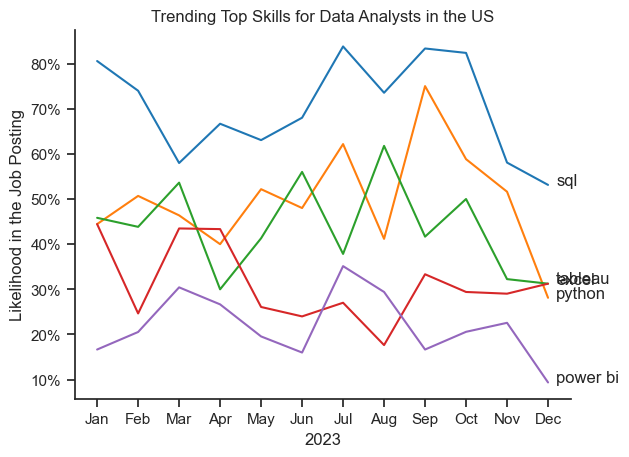

In [11]:
df_plot = df_DA_PL_percent.iloc[:, :5]

sns.lineplot(data = df_plot, dashes=False, palette="tab10")
sns.set_theme(style="ticks")
sns.despine()

plt.title("Trending Top Skills for Data Analysts in the US")
plt.ylabel("Likelihood in the Job Posting")
plt.xlabel("2023")
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

offsets = [0, -0.03, -0.025, 0.025, 0]


for i in range(5):
    y = df_plot.iloc[-1, i]
    plt.text(11.2, y + offsets[i], df_plot.columns[i])

plt.show()